<a href="https://colab.research.google.com/github/Reichidad/Machine-Learning-2020-Spring-Class/blob/assignment04/assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 04. Linear regression with multiple variables - 20145822 김영현
---
## 1. Plot the estimated parameters using the training dataset

## 2. Plot the training error using the training dataset

## 3. Plot the testing error using the testing dataset at every iteration of gradient descent until convergence



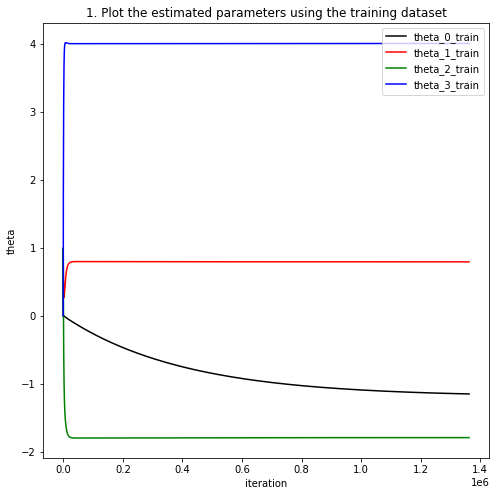

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

# Input data file read
# train sets
x_train = []
y_train = []
z_train = []
h_train = []

with open('/content/drive/My Drive/Colab Notebooks/data04/data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
      x_train.append(float(i[0]))
      y_train.append(float(i[1]))
      z_train.append(float(i[2]))
      h_train.append(float(i[3]))

# test sets
x_test = []
y_test = []
z_test = []
h_test = []

with open('/content/drive/My Drive/Colab Notebooks/data04/data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
      x_test.append(float(i[0]))
      y_test.append(float(i[1]))
      z_test.append(float(i[2]))
      h_test.append(float(i[3]))

# linear_model return the value's list of the linear_model
def linear_model(theta_0, theta_1, theta_2, theta_3, x, y, z):
  linear_model = []
  for i in range(len(x)):
    func_val = theta_0 + (theta_1 * x[i]) + (theta_2 * y[i]) + (theta_3 * z[i])
    linear_model.append(func_val)
  return linear_model

# objective_function return the objective function value
# by calculating with linear_model given thetas
def objective_function(linear_model, h):
  sum = 0
  for i in range(len(h)):
    sub = linear_model[i] - h[i]
    sum += sub ** 2

  return sum/(2 * len(h))
# theta_desc return the next theta
# Separate each theta by key value
def theta_desc(theta, linear_model, h, alpha, x, y, z, key):
  sum = 0
  for i in range(len(x)):
    sub = linear_model[i] - h[i]
    if key == 0:
      sum += sub
    elif key == 1:
      sum += sub * x[i]
    elif key == 2:
      sum += sub * y[i]
    elif key == 3:
      sum += sub * z[i]
      
  return theta - (alpha * sum/len(h))

# list for store theta values
theta_0_train_list = []
theta_1_train_list = []
theta_2_train_list = []
theta_3_train_list = []
ob_list = []

# theta value for each iteration
# initial conditions are all 0
theta_0_train = 0
theta_1_train = 0
theta_2_train = 0
theta_3_train = 0

# objective function value for each iteration
ob_value = 0
# running rate
alpha = 0.00001
# iteration counter
iteration = 0

# iteration for training set
while True:
  func_train = linear_model(theta_0_train, theta_1_train, theta_2_train, theta_3_train, x_train, y_train, z_train)
  ob_value = objective_function(func_train, h_train)

  theta_0_train_list.append(theta_0_train)
  theta_1_train_list.append(theta_1_train)
  theta_2_train_list.append(theta_2_train)
  theta_3_train_list.append(theta_3_train)
  ob_list.append(ob_value)

  # escape rule
  if iteration > 1:
    if ob_list[iteration-1] == ob_list[iteration] :
      iteration += 1
      break

  theta_0_train = theta_desc(theta_0_train, func_train, h_train, alpha, x_train, y_train, z_train, 0)
  theta_1_train = theta_desc(theta_1_train, func_train, h_train, alpha, x_train, y_train, z_train, 1)
  theta_2_train = theta_desc(theta_2_train, func_train, h_train, alpha, x_train, y_train, z_train, 2)
  theta_3_train = theta_desc(theta_3_train, func_train, h_train, alpha, x_train, y_train, z_train, 3)
  iteration += 1

# 1. Plot the estimated parameters using the training dataset
# theta at every iteration of gradient descent until convergence
# theta 0: black
# theta 1: red
# theta 2: green
# theta 3: blue
iterations = [i for i in range(iteration)]
plt.figure(1, figsize=(8,8))
plt.title("1. Plot the estimated parameters using the training dataset")
plt.xlabel("iteration")
plt.ylabel("theta")
plt.plot(iterations, theta_0_train_list, c='k', label="theta_0_train")
plt.plot(iterations, theta_1_train_list, c='r', label="theta_1_train")
plt.plot(iterations, theta_2_train_list, c='g', label="theta_2_train")
plt.plot(iterations, theta_3_train_list, c='b', label="theta_3_train")
plt.legend(loc='upper right')

plt.show()








In [0]:
()